# Lake Champlain

In [1]:
#--Import Python Libraries
#get_ipython().magic('matplotlib notebook')
%matplotlib inline  
import pandas as pd
import numpy as np
from DataGrabber import *

In [2]:
#--Enter State Code
state = 'ny'

#---------RUN----------#
gage_list1 = GotoUSGS(state)
print("\nCLICK HERE FOR USGS GAGES: \n", gage_list1)



CLICK HERE FOR USGS GAGES: 
 https://waterdata.usgs.gov/nwis/uv?referred_module=sw&state_cd=ny&site_tp_cd=OC&site_tp_cd=OC-CO&site_tp_cd=ES&site_tp_cd=LK&site_tp_cd=ST&site_tp_cd=ST-CA&site_tp_cd=ST-DCH&site_tp_cd=ST-TS&format=station_list


In [27]:
W = '04279085' # WHITEHALL
R = '04295000' # RICHELIEU

start, stop = '2009-10-30','2009-11-01' 
Wdata = 'https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_62614=on&format=rdb&site_no={}&period=&begin_date={}&end_date={}'.format(W, start, stop)
Rdata = 'https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_62614=on&format=rdb&site_no={}&period=&begin_date={}&end_date={}'.format(R, start, stop)


## Whitehall


In [28]:
dfw = pd.read_csv(Wdata, skiprows=26, sep='\t') 
dfw.rename(columns = {'107877_62614':'Stage'}, inplace=True)
dfw.drop(0, axis=0, inplace=True)
dfw['datetime'] = pd.to_datetime(dfw['datetime'], format= '%Y-%m-%d')
dfw['Stage'] = pd.to_numeric(dfw['Stage'])
dfw.head(2)


,agency_cd,site_no,datetime,tz_cd,Stage,107877_62614_cd
1,USGS,04279085,2009-10-30 00:00:00,EST,95.56,A
2,USGS,04279085,2009-10-30 00:15:00,EST,95.56,A


## Richelieu

In [30]:
dfr = pd.read_csv(Rdata, skiprows=26, sep='\t') 
dfr.rename(columns = {'107895_62614':'Stage'}, inplace=True)
dfr.drop(0, axis=0, inplace=True)
dfr['datetime'] = pd.to_datetime(dfr['datetime'], format= '%Y-%m-%d')
dfr['Stage'] = pd.to_numeric(dfr['Stage'])
dfr.head(2)

,agency_cd,site_no,datetime,tz_cd,Stage,107895_62614_cd
1,USGS,04295000,2009-10-30 00:00:00,EST,95.55,A
2,USGS,04295000,2009-10-30 00:15:00,EST,95.56,A


In [32]:
def plotter(dfw, dfr):
    x = dfw.datetime
    y = dfw.Stage

    x1 = dfr.datetime
    y1 = dfr.Stage

    plt.plot(x,y)
    plt.plot(x1,y1)
    plt.grid()
    plt.legend(['Whitehall (US)', 'Richeleiu (DS)'])

Seiche on Lake Champlain, October 2009


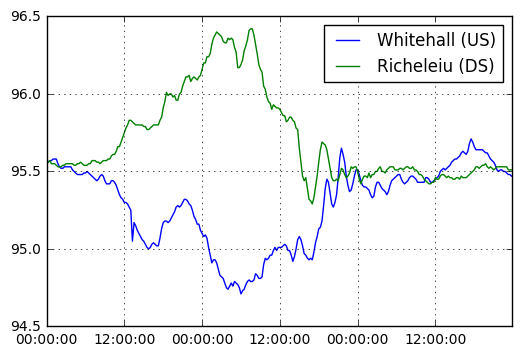

In [37]:
print('Seiche on Lake Champlain, October 2009')
plotter(dfw, dfr)
